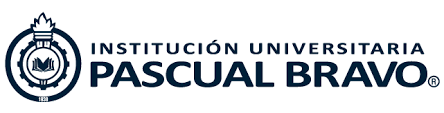

# Institución Universitaria Pascual Bravo

Curso: Reconocimeinto de patrones 2024-1

Docente: Juan Carlos Briñez de León


#1. Caso de aplicación: Productos de panadería

Saving Caso_2D.bmp to Caso_2D (2).bmp


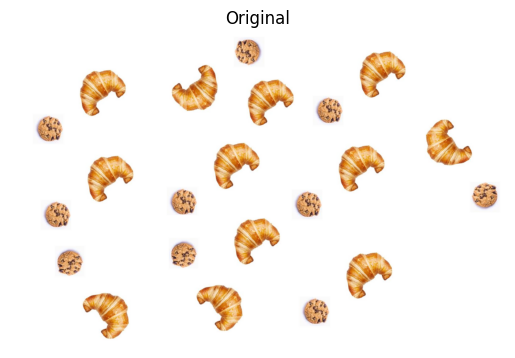

Su pedido contiene 12 Croissants, el subtotal de este producto es: 21600 Pesitos.
Su pedido contiene 10 Galletas, el subtotal de este producto es: 3000 Pesitos.
En total, su pedido suma: 24600 Pesitos.


In [22]:
# @title
#Cargando librerías
import cv2 as cv2 # OpenCV para computer vision
import numpy as np # Para cálculo de matrices
import matplotlib.pyplot as plt #Para graficar
import os #Habilita el manejo de directorios

from google.colab import files # Librería para activar uso del directorio

# Cargar una imagen desde tu dispositivo local
uploaded = files.upload()

# Leer la imagen con OpenCV
for filename in uploaded.keys():
    Imagen = cv2.imread(filename)

plt.imshow(Imagen[:,:,[2,1,0]].astype('uint8'),vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')
plt.show()

#Extracción de canales en HSV
Imagen_hsv = cv2.cvtColor(Imagen,cv2.COLOR_BGR2HSV)
Hue=Imagen_hsv[:,:,0]
Saturation=Imagen_hsv[:,:,1]
Value=Imagen_hsv[:,:,2]
#Extracción de canales en RGB
Imagen=Imagen[:,:,[2,1,0]]#Organiza
Rojo=Imagen[:,:,0]
Verde=Imagen[:,:,1]
Azul=Imagen[:,:,2]
Gris=cv2.cvtColor(Imagen, cv2.COLOR_BGR2GRAY)

#Buscando Croissants
Bin_Croissant = (Rojo > 180)*(Hue < 20)*(Azul < 55)*(Verde > 80)*(Saturation > 140)
#Mejorando resultado con apertura y cierre
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
Bin_Croissant_1 = cv2.morphologyEx(Bin_Croissant.astype('uint8'), cv2.MORPH_CLOSE, kernel)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))
Bin_Croissant_2= cv2.morphologyEx(Bin_Croissant_1.astype('uint8'), cv2.MORPH_OPEN, kernel2)
#Contando productos y calculando cuenta
(Bordes_Croissant,_) =cv2.findContours(Bin_Croissant_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(Bordes_Croissant)>0:
  print('Su pedido contiene '+ str(len(Bordes_Croissant))+' Croissants, el subtotal de este producto es: ' + str(len(Bordes_Croissant)*1800)+' Pesitos.')

#Buscando galletas y calculando el subtotal
Bin_Galletas = (Rojo > 145)*(Rojo < 165)*(Hue < 20)*(Azul < 65)*(Verde > 80)*(Saturation < 200)
#Mejorando resultado con apertura y cierre
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
Bin_Galletas_1 = cv2.morphologyEx(Bin_Galletas.astype('uint8'), cv2.MORPH_CLOSE, kernel)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
Bin_Galletas_2= cv2.morphologyEx(Bin_Galletas_1.astype('uint8'), cv2.MORPH_OPEN, kernel2)
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
Bin_Galletas_3 = cv2.dilate(Bin_Galletas_2.astype('uint8'),kernel3)
#Contando productos y calculando cuenta
(Bordes_Galletas,_) =cv2.findContours(Bin_Galletas_3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(Bordes_Galletas)>0:
  print('Su pedido contiene '+ str(len(Bordes_Galletas))+' Galletas, el subtotal de este producto es: ' + str(len(Bordes_Galletas)*300)+' Pesitos.')

#Buscando donas  de chocolate
Bin_DonasN = (Rojo < 60)*(Verde < 70)*(Hue > 15)*(Value < 80)
#Mejorando resultado con apertura y cierre
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
Bin_DonasN_1 = cv2.morphologyEx(Bin_DonasN.astype('uint8'), cv2.MORPH_CLOSE, kernel)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
Bin_DonasN_2= cv2.morphologyEx(Bin_DonasN_1.astype('uint8'), cv2.MORPH_OPEN, kernel2)
#Contando productos y calculando cuenta
(Bordes_DonasN,_) =cv2.findContours(Bin_DonasN_2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(Bordes_DonasN)>0:
  print('Su pedido contiene '+ str(len(Bordes_DonasN))+' Donas de chocolate, el subtotal de este producto es: ' + str(len(Bordes_DonasN)*2300)+' Pesitos.')

#Buscando donas  blancas
Bin_DonasB = (Rojo > 190)*(Azul > 180)*(Verde > 180)*(Hue > 160)*(Saturation > 30)
#Mejorando resultado con apertura y cierre
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(50,50))
Bin_DonasB_1 = cv2.morphologyEx(Bin_DonasB.astype('uint8'), cv2.MORPH_CLOSE, kernel)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
Bin_DonasB_2= cv2.morphologyEx(Bin_DonasB_1.astype('uint8'), cv2.MORPH_OPEN, kernel2)
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))
Bin_DonasB_3 = cv2.dilate(Bin_DonasB_2.astype('uint8'),kernel3)
#Contando productos y calculando cuenta
(Bordes_DonasB,_) =cv2.findContours(Bin_DonasB_3, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if len(Bordes_DonasB)>0:
  print('Su pedido contiene '+ str(len(Bordes_DonasB))+' Donas blancas, el subtotal de este producto es: ' + str(len(Bordes_DonasB)*2300)+' Pesitos.')

#Calculando cuenta final
print('En total, su pedido suma: ' + str(len(Bordes_Croissant)*1800 + len(Bordes_Galletas)*300 + len(Bordes_DonasN)*2300 + len(Bordes_DonasB)*2300) + ' Pesitos.')


#2. Una aproximación a imágenes digitales

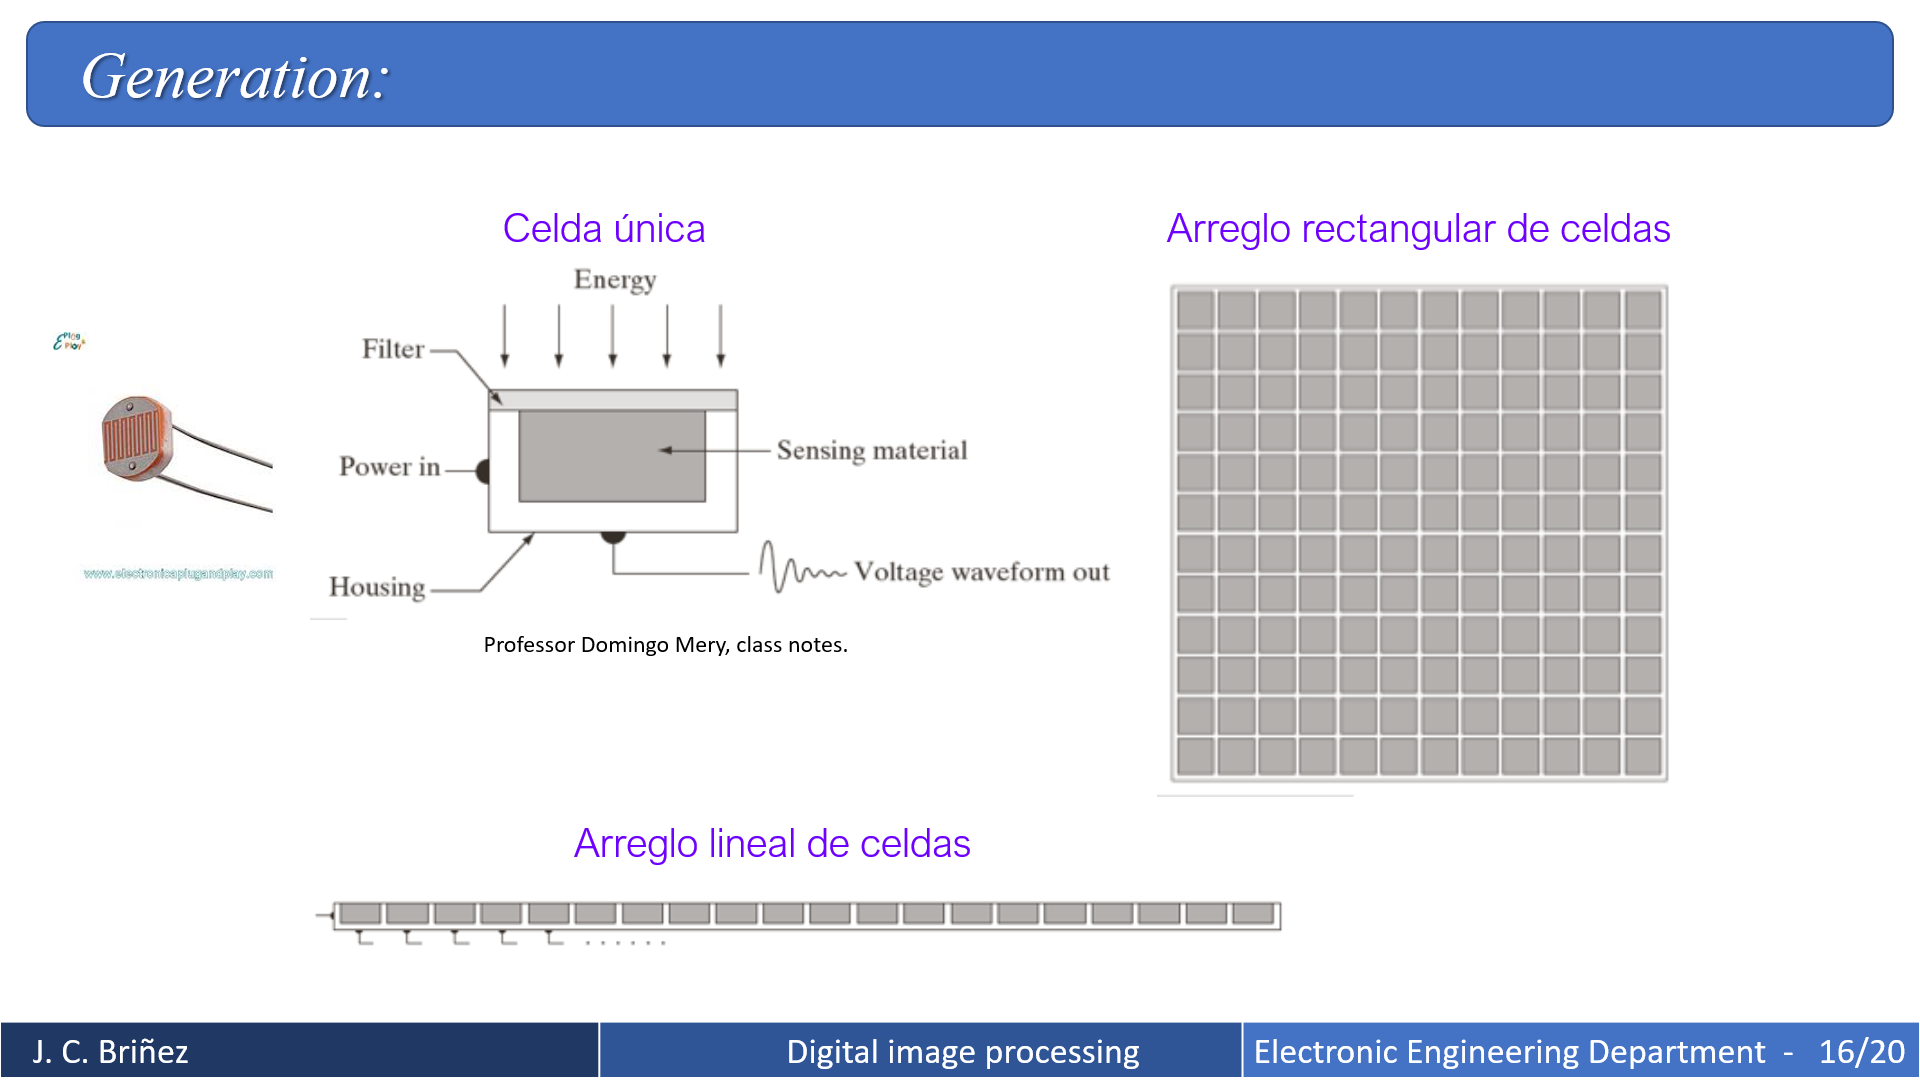

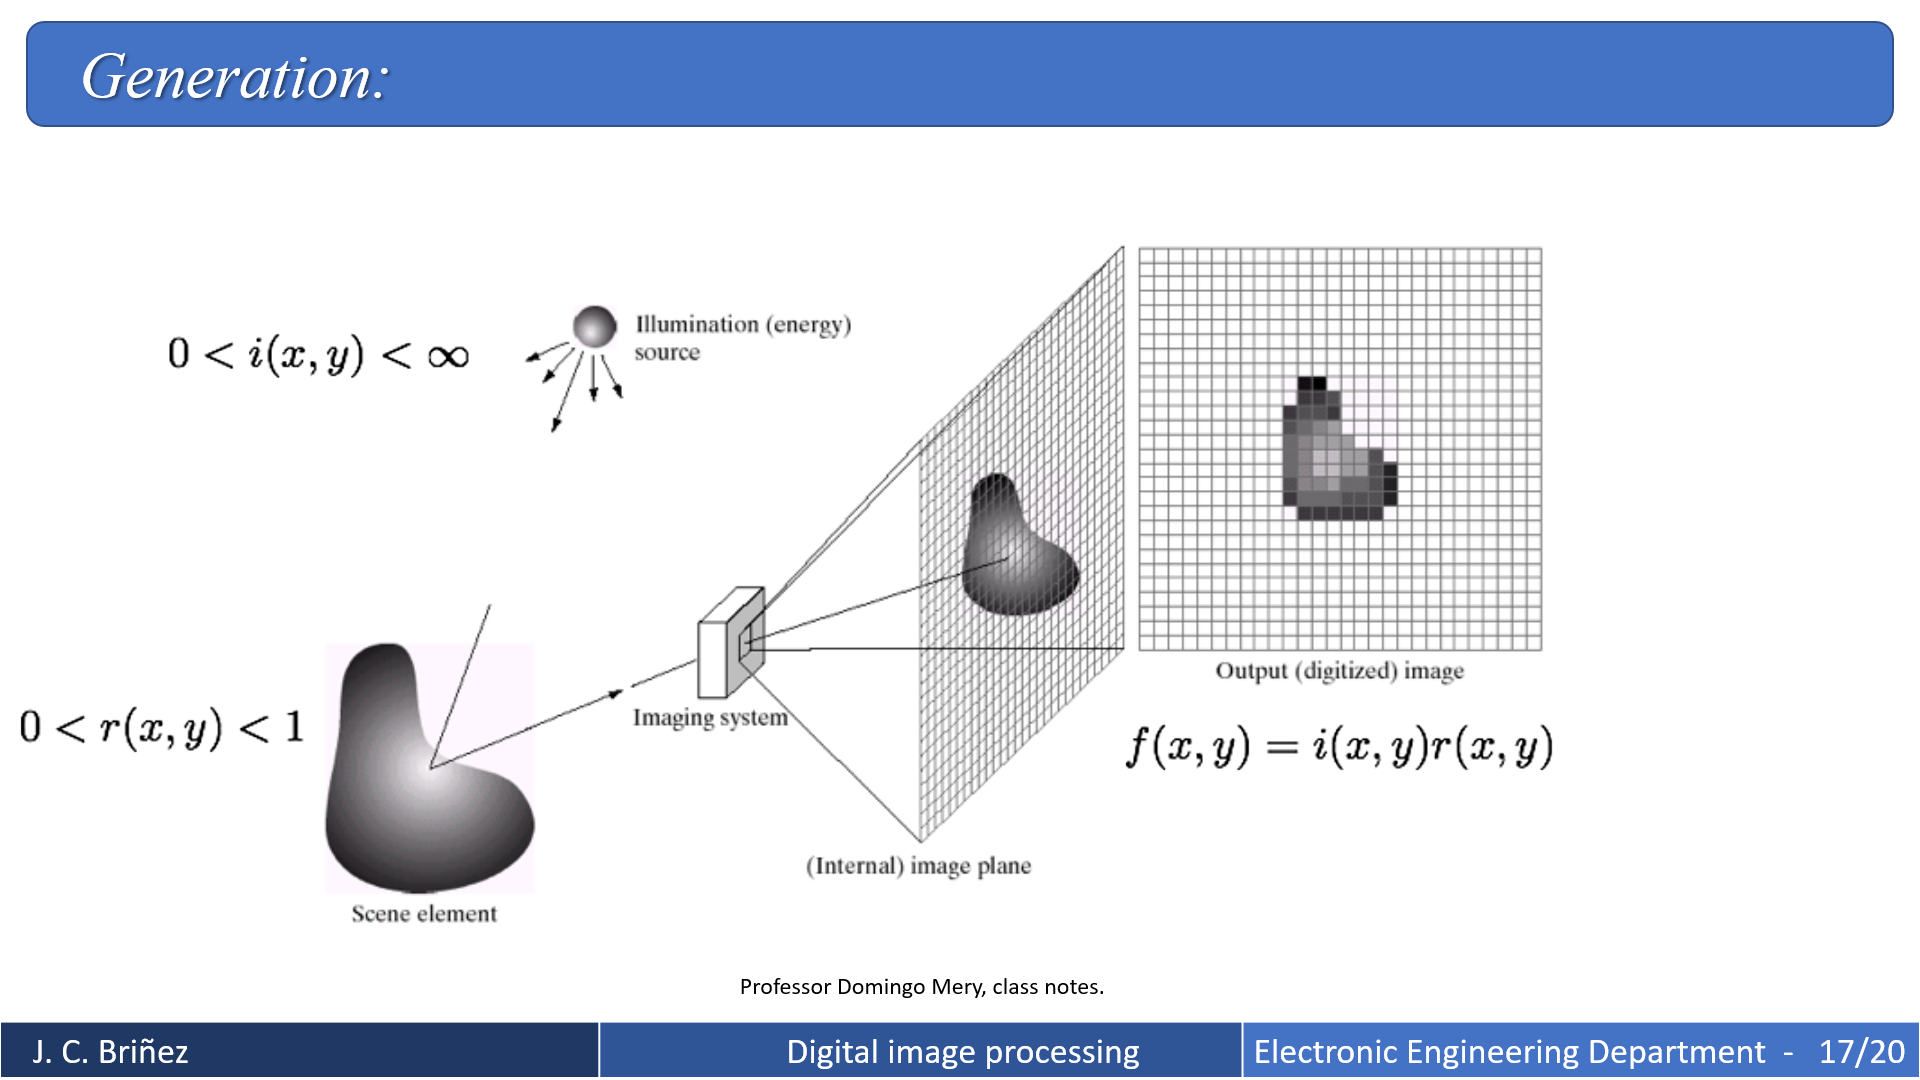

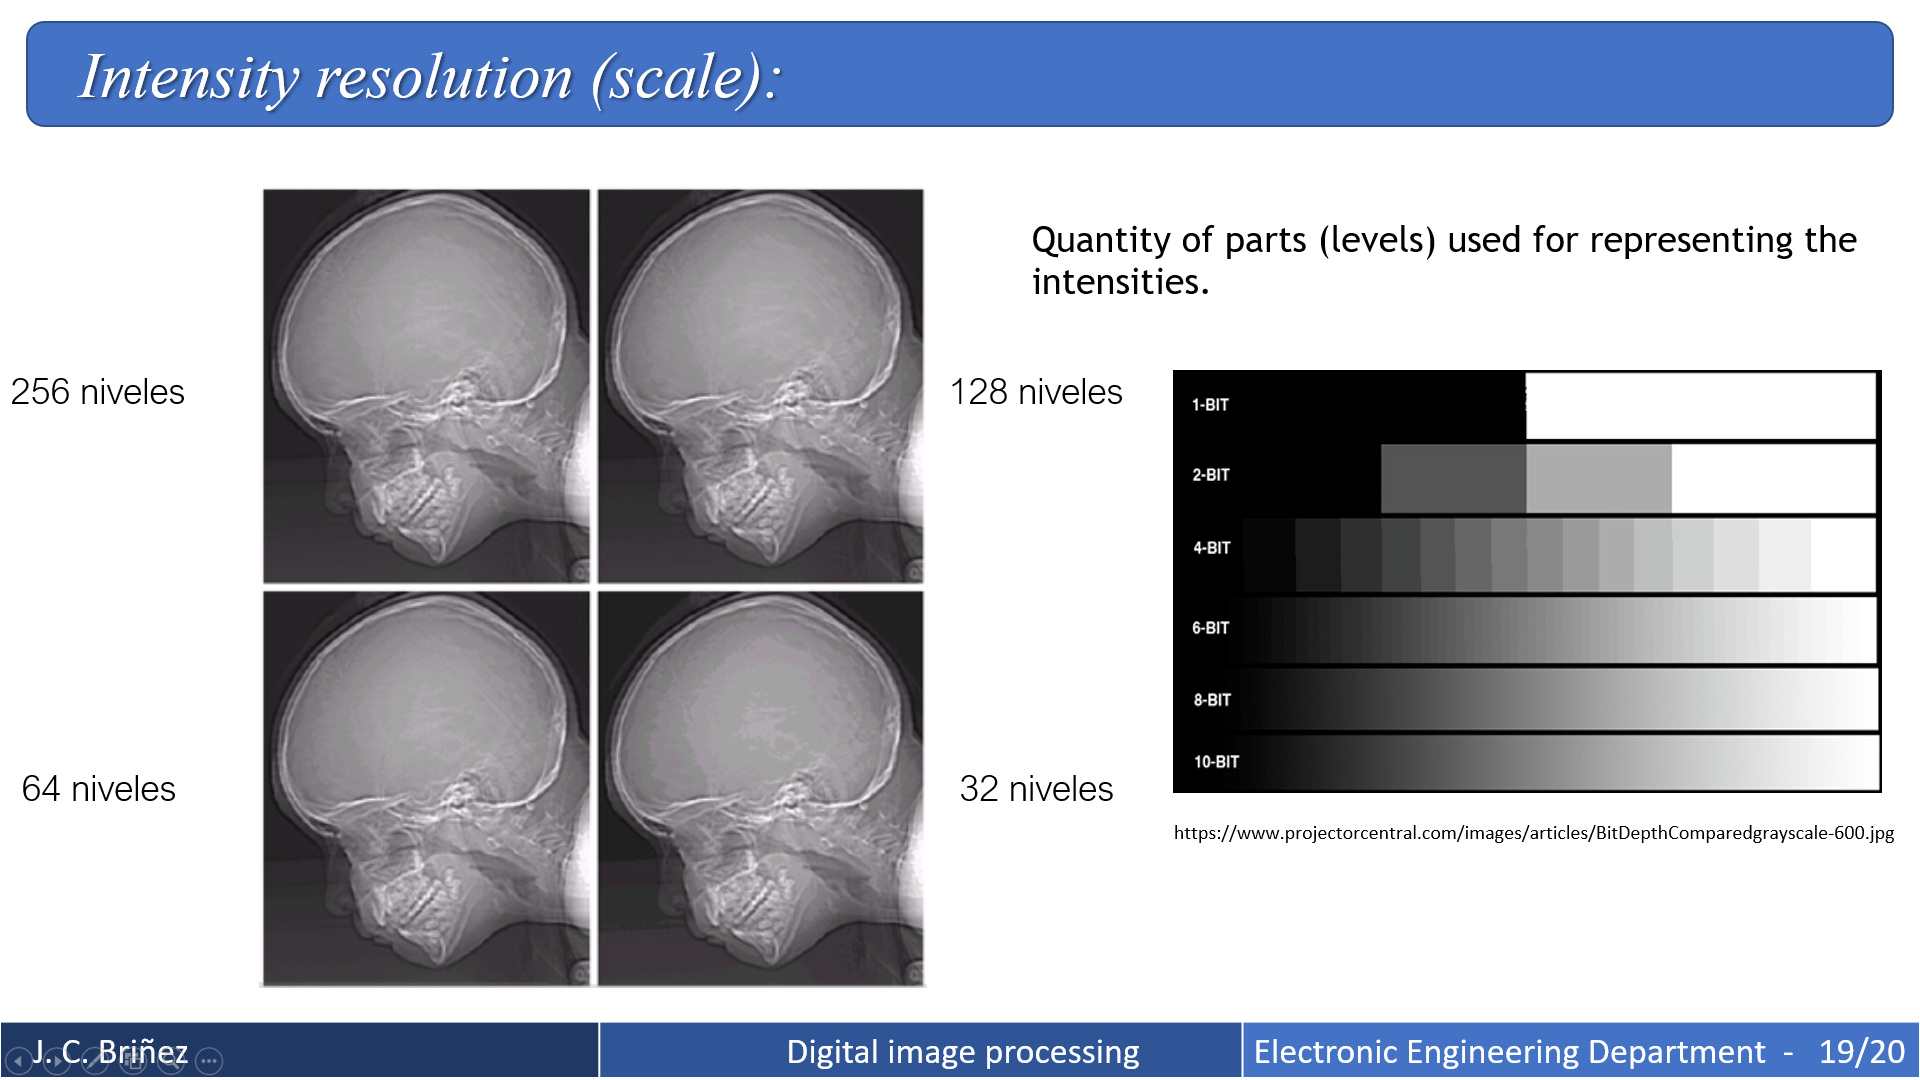

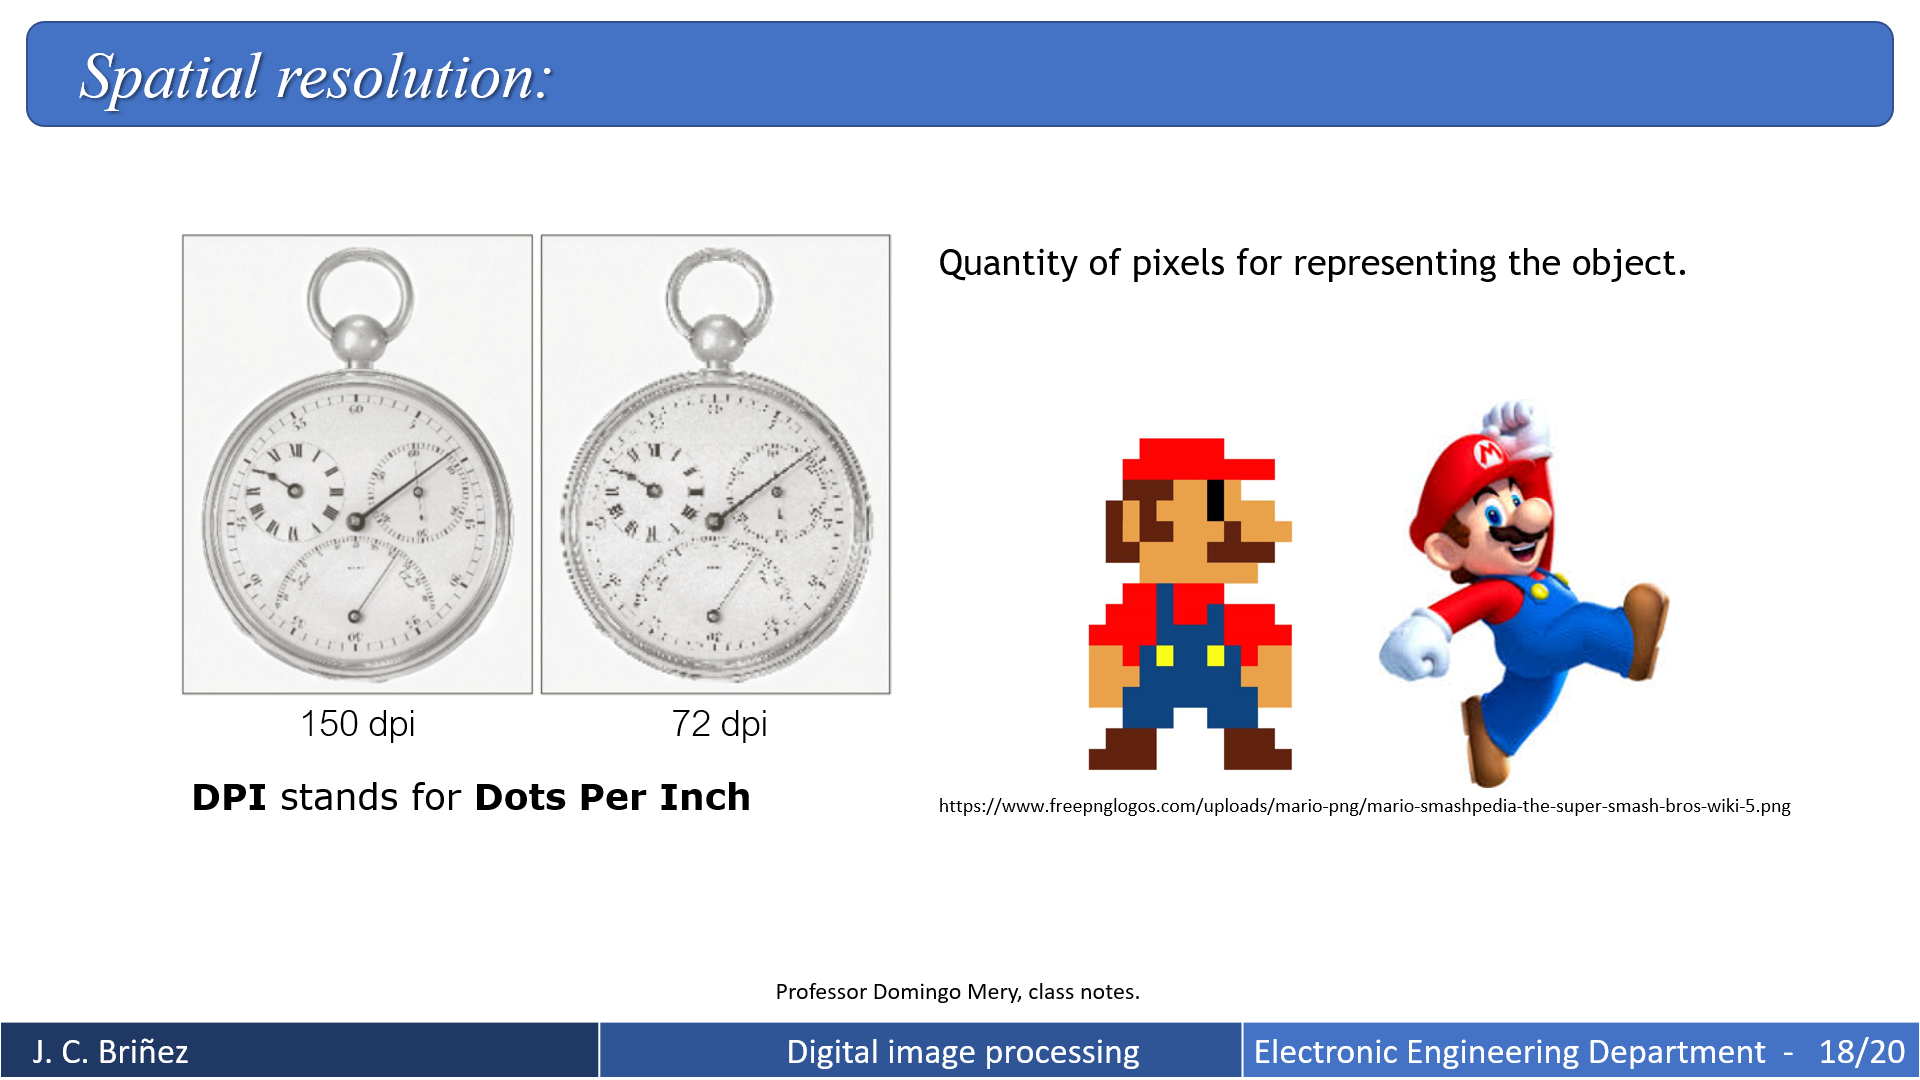

Enlaces recomendados:
http://platea.pntic.mec.es/~lgonzale/tic/imagen/conceptos.html

https://www.famaf.unc.edu.ar/~pperez1/manuales/cim/cap2.html

https://omes-va.com/leerimagen/


#3. Manipulando imágenes

Cargando imágenes con la herramienta de montaje de archivos

Saving Caso_2C.bmp to Caso_2C (7).bmp


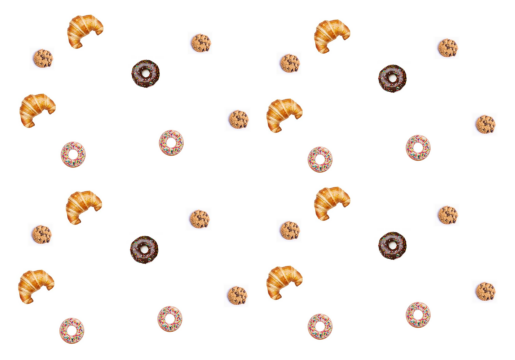

In [23]:
#Cargando librerías
import cv2 # Librería OpenCv
from google.colab import files # Librería para activar uso del directorio
import matplotlib.pyplot as plt # Librería para gráficos

# Cargar una imagen desde tu dispositivo local
uploaded = files.upload()

# Leer la imagen con OpenCV
for filename in uploaded.keys():
    img = cv2.imread(filename)

    # Convertir de BGR a RGB (matplotlib espera imágenes en formato RGB)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen usando matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Desactivar los ejes para una presentación más limpia
    plt.show()

Cargando imágenes desde drive

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

import cv2
import matplotlib.pyplot as plt

# Ruta de la imagen en Google Drive
Ruta = '/content/Imagen1.png'  # Reemplaza con  tu RUTA

# Leer la imagen con OpenCV
img = cv2.imread(Ruta)

# Ajusta el color de las imágenes
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Analizando los canales de color

Saving Caso_2A.bmp to Caso_2A (4).bmp


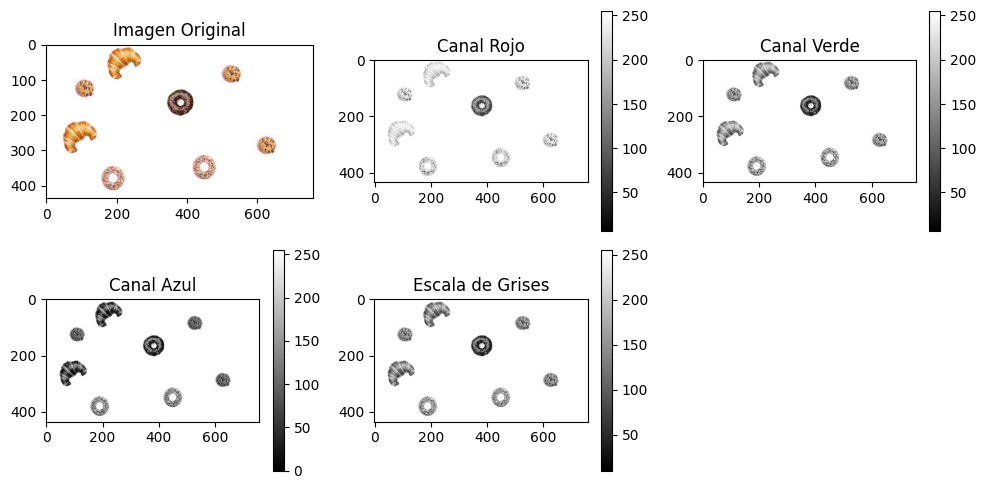

In [24]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Sube una imagen desde tu computadora a Colab
Archivo = files.upload()

# Lee la imagen desde BytesIO
for filename, content in Archivo.items():
    img = cv2.imread(filename)
    img_cv2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Muestra la imagen original
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.imshow(img_cv2)
plt.title('Imagen Original')

# Muestra los canales de color por separado
canal_azul, canal_verde, canal_rojo = cv2.split(img)

plt.subplot(2, 3, 4)
plt.imshow(canal_azul, cmap='gray')
plt.title('Canal Azul')
plt.colorbar()

plt.subplot(2, 3, 3)
plt.imshow(canal_verde, cmap='gray')
plt.title('Canal Verde')
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(canal_rojo, cmap='gray')
plt.title('Canal Rojo')
plt.colorbar()

# Muestra la versión en escala de grises
img_gris = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY)
plt.subplot(2, 3, 5)
plt.imshow(img_gris, cmap='gray')
plt.title('Escala de Grises')
plt.colorbar()

plt.tight_layout()
plt.show()

In [25]:
print(canal_rojo)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [27]:
print(canal_rojo[190,390])

77
